In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.shape

(29531, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
df.isnull().mean()*100

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

In [7]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


## Data cleaning

### co 

<AxesSubplot:xlabel='CO'>

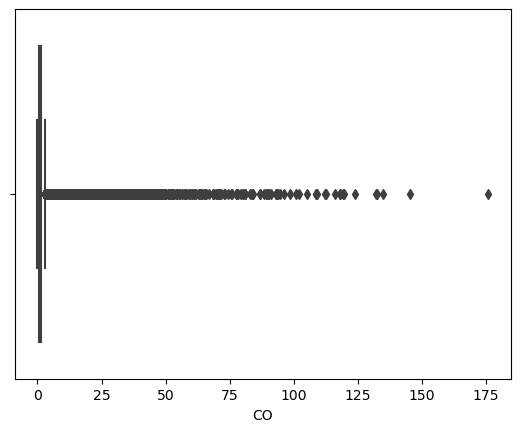

In [8]:
sns.boxplot(df,x='CO')

In [25]:
# fill the null value with median
def median(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)

In [26]:
med=df['CO'].median()

In [27]:
median(df,'CO',med)

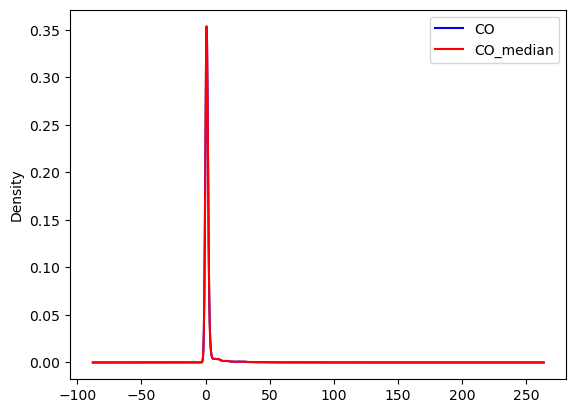

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['CO'].plot(kind='kde', ax=ax,color='blue')
df['CO_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
# above plot show the distribution of co & comedian
# their is no differnce in distribution so we can fill nan value with median in co col

In [19]:
df['CO']=df['CO'].fillna(df['CO'].median())

### NOx

<AxesSubplot:xlabel='NOx'>

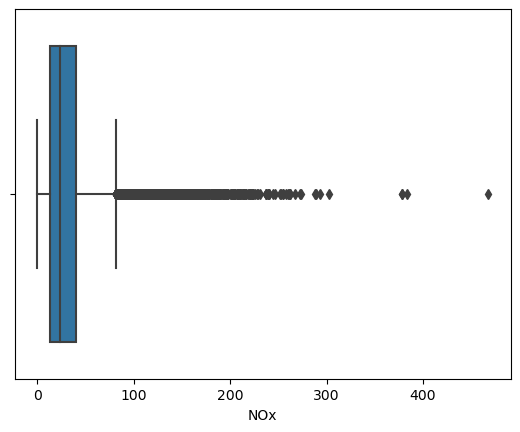

In [22]:
sns.boxplot(df,x='NOx')

In [30]:
def impute1(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    random=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random

In [31]:
impute1(df,'NOx',df['NOx'].median())

In [32]:
end=df['NOx'].mean()+3*df['NOx'].std()
df['NOx_endofdis']=df['NOx'].fillna(end)

In [33]:
df['NOx_arb']=df['NOx'].fillna(-1)

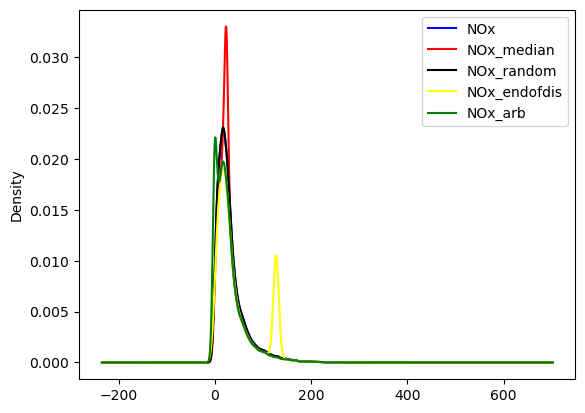

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['NOx'].plot(kind='kde', ax=ax,color='blue')
df['NOx_median'].plot(kind='kde', ax=ax, color='red')
df['NOx_random'].plot(kind='kde', ax=ax,color='black' )
df['NOx_endofdis'].plot(kind='kde',ax=ax,color='yellow')
df['NOx_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [36]:
df=df.drop('CO_median',axis=1)
df=df.drop('NOx_median',axis=1)
df=df.drop('NOx_random',axis=1)
df=df.drop('NOx_endofdis',axis=1)
df=df.drop('NOx_arb',axis=1)

In [ ]:
# we can use random value to fill the nan value in NOx volue becoz the distribution of Nox and Nox_random are same

In [37]:
def random(df,variable):
    random=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random

In [38]:
random(df,'NOx')

In [39]:
df['NOx'].isnull().sum()

0

## SO2

In [40]:
def impute(df,variable,median,end,val):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_end']=df[variable].fillna(end)
    df[variable+'_arb']=df[variable].fillna(val)
    df[variable+'_random']=df[variable]
    random=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random

In [41]:
end=df['SO2'].mean()+3*df['SO2'].std()
med=df['SO2'].median()
impute(df,'SO2',med,end,0)

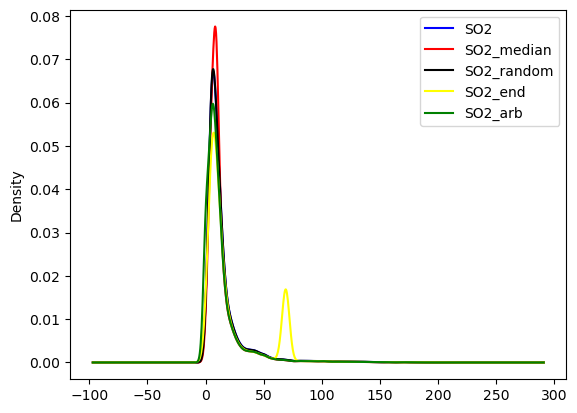

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['SO2'].plot(kind='kde', ax=ax,color='blue')
df['SO2_median'].plot(kind='kde', ax=ax, color='red')
df['SO2_random'].plot(kind='kde', ax=ax,color='black' )
df['SO2_end'].plot(kind='kde',ax=ax,color='yellow')
df['SO2_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [43]:
df=df.drop('SO2_median',axis=1)
df=df.drop('SO2_random',axis=1)
df=df.drop('SO2_end',axis=1)
df=df.drop('SO2_arb',axis=1)

In [44]:
random(df,'SO2')

### O3

In [45]:
end=df['O3'].mean()+3*df['O3'].std()
med=df['O3'].median()
impute(df,'O3',med,end,0)


In [46]:
df=df.drop('O3_arb',axis=1)

In [47]:
df['O3_arb']=df['O3'].fillna(100)

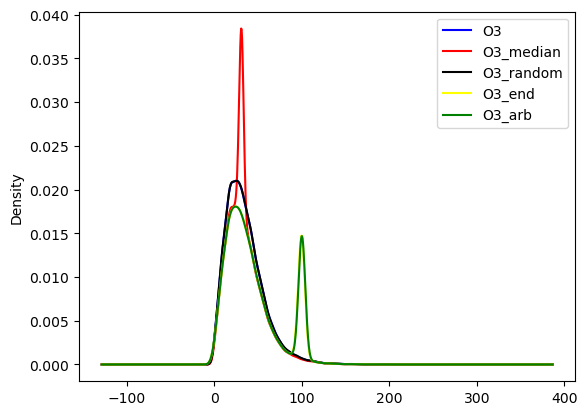

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['O3'].plot(kind='kde', ax=ax,color='blue')
df['O3_median'].plot(kind='kde', ax=ax, color='red')
df['O3_random'].plot(kind='kde', ax=ax,color='black' )
df['O3_end'].plot(kind='kde',ax=ax,color='yellow')
df['O3_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [51]:
df=df.drop('O3_median',axis=1)
df=df.drop('O3_random',axis=1)
df=df.drop('O3_end',axis=1)
df=df.drop('O3_arb',axis=1)

In [52]:
# we use random value to fill nan value in O3 col 
random(df,'O3')

### NO

In [53]:
end=df['NO'].mean()+3*df['NO'].std()
med=df['NO'].median()
impute(df,'NO',med,end,0)

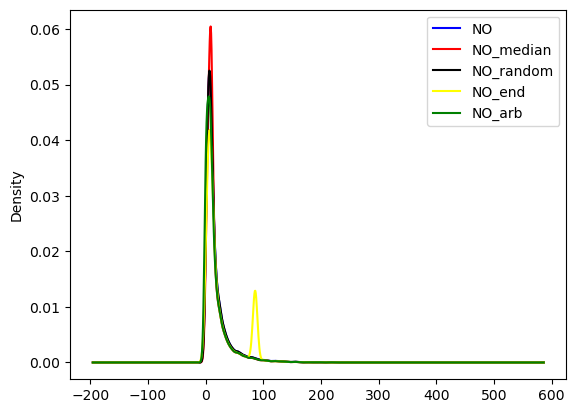

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['NO'].plot(kind='kde', ax=ax,color='blue')
df['NO_median'].plot(kind='kde', ax=ax, color='red')
df['NO_random'].plot(kind='kde', ax=ax,color='black' )
df['NO_end'].plot(kind='kde',ax=ax,color='yellow')
df['NO_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

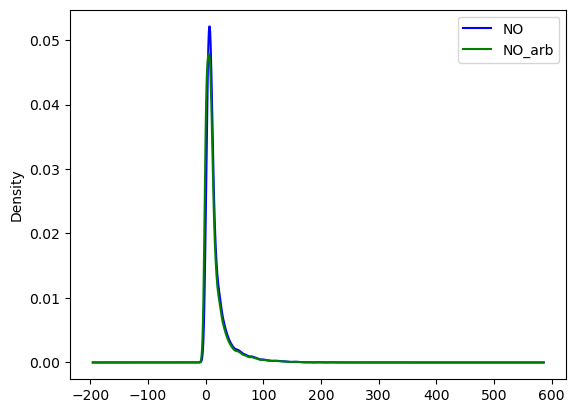

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['NO'].plot(kind='kde', ax=ax,color='blue')
#df['NO_random'].plot(kind='kde', ax=ax,color='black')
df['NO_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [56]:
df=df.drop('NO_median',axis=1)
df=df.drop('NO_random',axis=1)
df=df.drop('NO_end',axis=1)
df=df.drop('NO_arb',axis=1)

In [57]:
random(df,'NO')      # we use random value to fill nan value in NO

### NO2

In [58]:
end=df['NO2'].mean()+3*df['NO2'].std()
med=df['NO2'].median()
impute(df,'NO2',med,end,0)

In [59]:
df=df.drop('NO2_arb',axis=1)

In [60]:
df['NO2_arb']=df['NO2'].fillna(50)

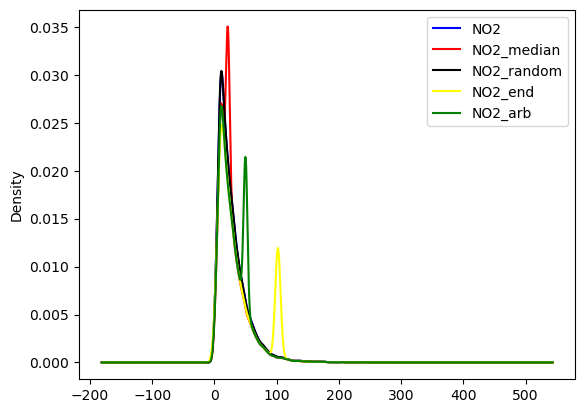

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['NO2'].plot(kind='kde', ax=ax,color='blue')
df['NO2_median'].plot(kind='kde', ax=ax, color='red')
df['NO2_random'].plot(kind='kde', ax=ax,color='black' )
df['NO2_end'].plot(kind='kde',ax=ax,color='yellow')
df['NO2_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

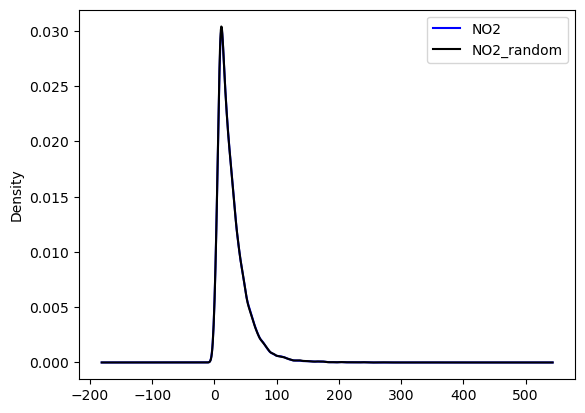

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['NO2'].plot(kind='kde', ax=ax,color='blue')
df['NO2_random'].plot(kind='kde', ax=ax,color='black' )
#df['NO2_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [63]:
df=df.drop('NO2_median',axis=1)
df=df.drop('NO2_random',axis=1)
df=df.drop('NO2_end',axis=1)
df=df.drop('NO2_arb',axis=1)

In [64]:
random(df,'NO2')  # we use random value to fill nan value in NO2

### NOX

In [65]:
end=df['NOx'].mean()+3*df['NOx'].std()
med=df['NOx'].median()
impute(df,'NOx',med,end,0)

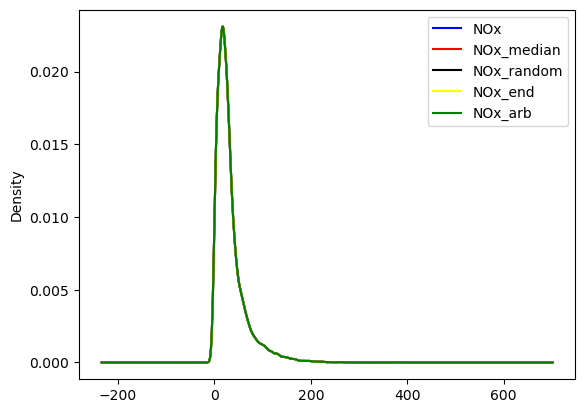

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['NOx'].plot(kind='kde', ax=ax,color='blue')
df['NOx_median'].plot(kind='kde', ax=ax, color='red')
df['NOx_random'].plot(kind='kde', ax=ax,color='black' )
df['NOx_end'].plot(kind='kde',ax=ax,color='yellow')
df['NOx_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [67]:
df['NOx']=df['NOx'].fillna(0)   # we use 0 to fill nan value in NOx

In [68]:
df=df.drop('NOx_median',axis=1)
df=df.drop('NOx_random',axis=1)
df=df.drop('NOx_end',axis=1)
df=df.drop('NOx_arb',axis=1)

### Benzene

In [69]:
end=df['Benzene'].mean()+3*df['Benzene'].std()  
med=df['Benzene'].median()
impute(df,'Benzene',med,end,0)

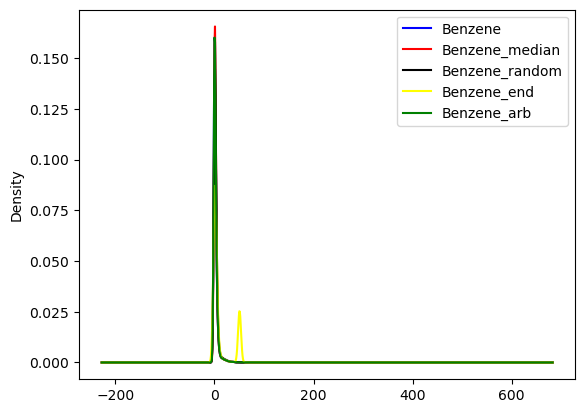

In [75]:

fig = plt.figure()
ax = fig.add_subplot(111)
df['Benzene'].plot(kind='kde', ax=ax,color='blue')
df['Benzene_median'].plot(kind='kde', ax=ax, color='red')
df['Benzene_random'].plot(kind='kde', ax=ax,color='black' )
df['Benzene_end'].plot(kind='kde',ax=ax,color='yellow')
df['Benzene_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [76]:
df['Benzene']=df['Benzene'].fillna(0)  # we use 0 to fill nan value in benzene

In [77]:
df=df.drop('Benzene_median',axis=1)
df=df.drop('Benzene_random',axis=1)
df=df.drop('Benzene_end',axis=1)
df=df.drop('Benzene_arb',axis=1)

### Toluene

In [78]:
end=df['Toluene'].mean()+3*df['Toluene'].std()  
med=df['Toluene'].median()
impute(df,'Toluene',med,end,0)

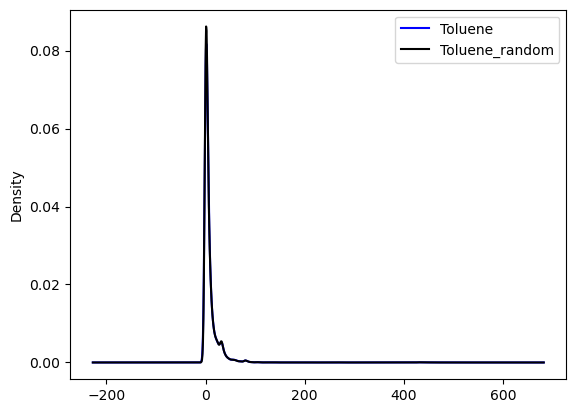

In [157]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Toluene'].plot(kind='kde', ax=ax,color='blue')
df['Toluene_median'].plot(kind='kde', ax=ax, color='red')
df['Toluene_random'].plot(kind='kde', ax=ax,color='black' )
df['Toluene_end'].plot(kind='kde',ax=ax,color='yellow')
df['Toluene_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [79]:
df=df.drop('Toluene_median',axis=1)
df=df.drop('Toluene_random',axis=1)
df=df.drop('Toluene_end',axis=1)
df=df.drop('Toluene_arb',axis=1)

In [80]:
random(df,'Toluene')

## NH3

In [81]:
end=df['NH3'].mean()+3*df['NH3'].std()  
med=df['NH3'].median()
impute(df,'NH3',med,end,0)

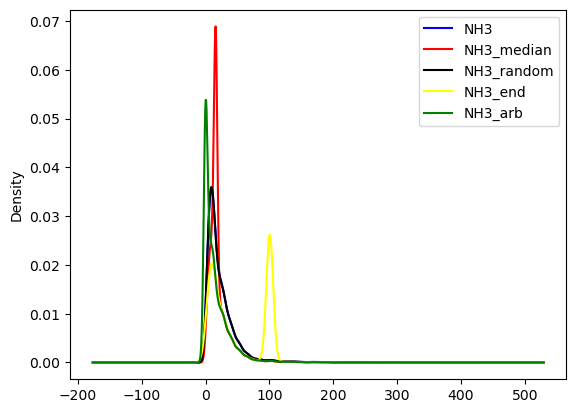

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['NH3'].plot(kind='kde', ax=ax,color='blue')
df['NH3_median'].plot(kind='kde', ax=ax, color='red')
df['NH3_random'].plot(kind='kde', ax=ax,color='black' )
df['NH3_end'].plot(kind='kde',ax=ax,color='yellow')
df['NH3_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

####  we use random value to fill nan value in NH3 

In [82]:
df=df.drop('NH3_median',axis=1)
df=df.drop('NH3_end',axis=1)
df=df.drop('NH3_arb',axis=1)

In [94]:
df=df.drop('NH3_random',axis=1)

In [83]:
random(df,'NH3')

### Xylene 

In [97]:
end=df['Xylene'].mean()+3*df['Xylene'].std()  
med=df['Xylene'].median()
df['Xylene_end']=df['Xylene'].fillna(end)
df['Xylene_med']=df['Xylene'].fillna(med)
df['Xylene_arb']=df['Xylene'].fillna(0)

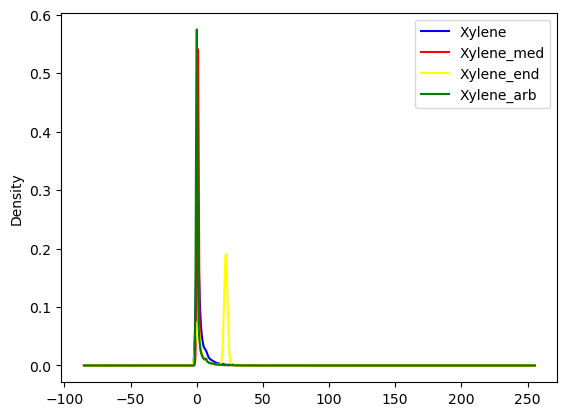

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Xylene'].plot(kind='kde', ax=ax,color='blue')
df['Xylene_med'].plot(kind='kde', ax=ax, color='red')
df['Xylene_end'].plot(kind='kde',ax=ax,color='yellow')
df['Xylene_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [103]:
df['Xylene']=df['Xylene'].fillna(0)      # we use 0 to fill nan value in PM10 becoz it follow the distribution with Xylene

In [104]:
df=df.drop('Xylene_arb',axis=1)
df=df.drop('Xylene_end',axis=1)
df=df.drop('Xylene_med',axis=1)

### PM2.5

In [105]:
end=df['PM2.5'].mean()+3*df['PM2.5'].std()   
med=df['PM2.5'].median()
impute(df,'PM2.5',med,end,0)

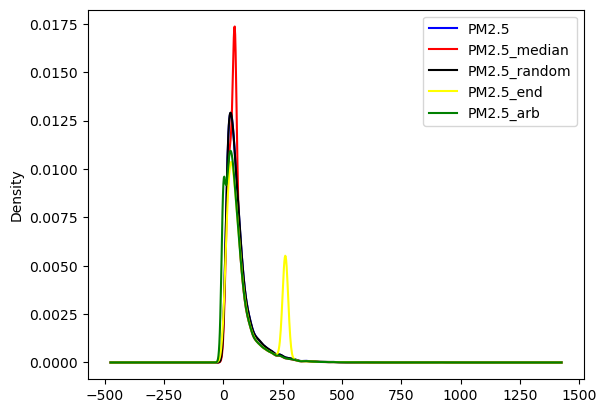

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['PM2.5'].plot(kind='kde', ax=ax,color='blue')
df['PM2.5_median'].plot(kind='kde', ax=ax, color='red')
df['PM2.5_random'].plot(kind='kde', ax=ax,color='black' )
df['PM2.5_end'].plot(kind='kde',ax=ax,color='yellow')
df['PM2.5_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [107]:
random(df,'PM2.5')       # we use random value to fill nan value in PM10

In [108]:
df=df.drop('PM2.5_arb',axis=1)
df=df.drop('PM2.5_end',axis=1)
df=df.drop('PM2.5_median',axis=1)
df=df.drop('PM2.5_random',axis=1)

### PM10

In [109]:
end=df['PM10'].mean()+3*df['PM10'].std()   
med=df['PM10'].median()
impute(df,'PM10',med,end,0)

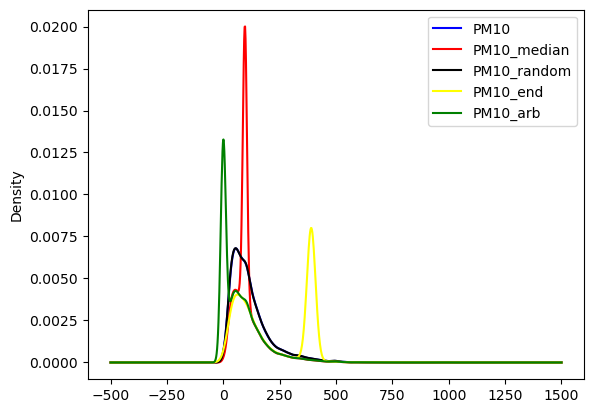

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['PM10'].plot(kind='kde', ax=ax,color='blue')
df['PM10_median'].plot(kind='kde', ax=ax, color='red')
df['PM10_random'].plot(kind='kde', ax=ax,color='black' )
df['PM10_end'].plot(kind='kde',ax=ax,color='yellow')
df['PM10_arb'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [111]:
random(df,'PM10')  # we use random value to fill nan value in PM10

In [112]:
df=df.drop('PM10_arb',axis=1)
df=df.drop('PM10_end',axis=1)
df=df.drop('PM10_median',axis=1)
df=df.drop('PM10_random',axis=1)

#### After filling all nan value except AQI

In [238]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI           4681
AQI_Bucket    4681
NH3_random       0
dtype: int64

In [ ]:
df['AQI']=np.where(df['AQI'].isnull(),round(df[["PM2.5","PM10", "SO2",'NO','NO2',"NOx",
                                 "NH3", "CO", "O3",'Benzene', 'Toluene', 'Xylene']].max(axis = 1)),df['AQI'])

# outlier detection and remove

In [ ]:
PM2.5       
PM10        
NO          
NO2         
NOx        
NH3         
CO          
SO2        
O3          
Benzene     
Toluene     
Xylene      

### PM2.5     

In [239]:
df['PM2.5'].describe()

count    29531.000000
mean        67.458617
std         64.608811
min          0.040000
25%         28.780000
50%         48.620000
75%         80.620000
max        949.990000
Name: PM2.5, dtype: float64

<AxesSubplot:xlabel='PM2.5'>

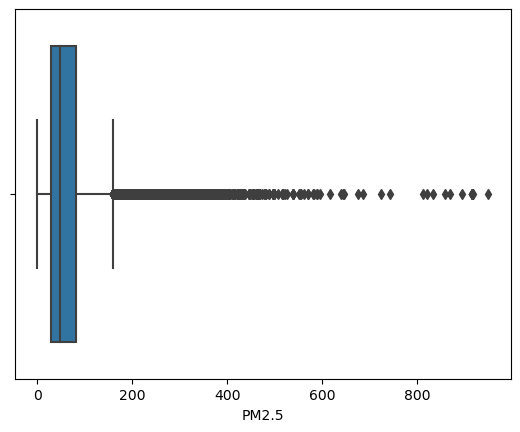

In [240]:
sns.boxplot(df,x='PM2.5')

In [246]:
# assuming age follow gaussain distribution we will calculates the boundaries which differentiates the outlier

upper_boundary=df['PM2.5'].mean()+3*df['PM2.5'].std()
lower_boundary=df['PM2.5'].mean()-3*df['PM2.5'].std()
print(upper_boundary)
print(lower_boundary)
print(df['PM2.5'].mean())

261.2850503516672
-126.36781625868052
67.45861704649336


In [113]:
IQR=df['PM2.5'].quantile(0.75)-df['PM2.5'].quantile(0.25)

In [114]:
upper_bridge=df['PM2.5'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['PM2.5'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-48.980000000000004
158.38


In [250]:
upper_bridge1=df['PM2.5'].quantile(0.75)+(IQR*3)
lower_bridge1=df['PM2.5'].quantile(0.25)-(IQR*3)
print(lower_bridge1)
print(upper_bridge1)

-126.74000000000001
236.14000000000001


In [115]:
df.loc[df['PM2.5']>159,'PM2.5']=159

<AxesSubplot:xlabel='PM2.5'>

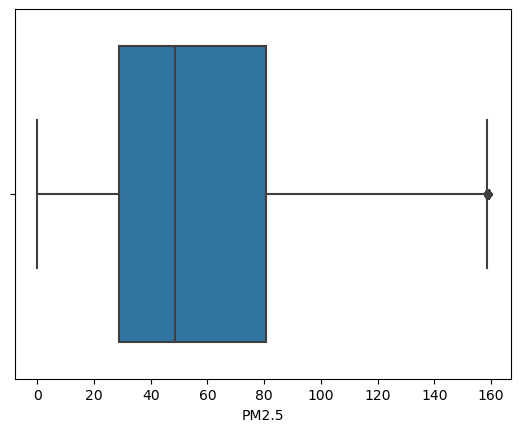

In [116]:
sns.boxplot(df,x='PM2.5')

### PM10 

In [255]:
df['PM10'].describe()

count    29531.000000
mean       118.516148
std         91.222994
min          0.010000
25%         56.280000
50%         95.760000
75%        150.290000
max       1000.000000
Name: PM10, dtype: float64

<AxesSubplot:xlabel='PM10'>

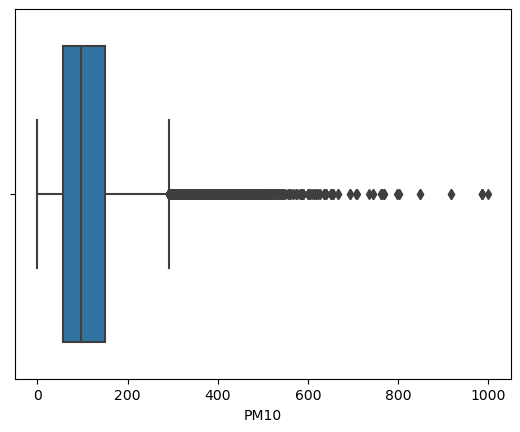

In [256]:
sns.boxplot(df,x='PM10')

In [260]:
upper_boundary=df['PM10'].mean()+3*df['PM10'].std()
lower_boundary=df['PM10'].mean()-3*df['PM10'].std()
print(upper_boundary)
print(lower_boundary)
print(df['PM10'].mean())

392.1851308610531
-155.15283530722917
118.51614777691196


In [ ]:
IQR=df['PM10'].quantile(0.75)-df['PM10'].quantile(0.25)

In [117]:
upper_bridge=df['PM10'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['PM10'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-21.480000000000004
228.05


In [262]:
upper_bridge1=df['PM10'].quantile(0.75)+(IQR*3)
lower_bridge1=df['PM10'].quantile(0.25)-(IQR*3)
print(lower_bridge1)
print(upper_bridge1)

-99.24000000000001
305.81


In [118]:
df.loc[df['PM10']>229,'PM10']=229

<AxesSubplot:xlabel='PM10'>

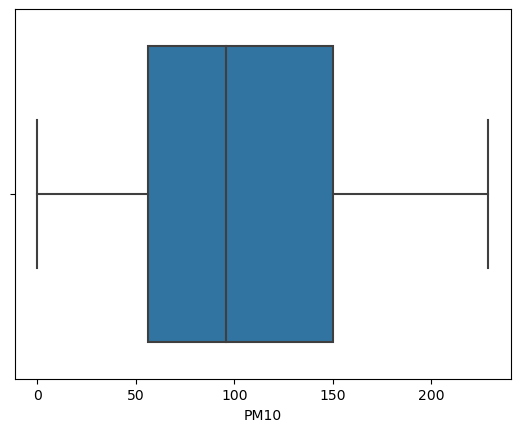

In [119]:
sns.boxplot(df,x='PM10')

### NO

In [279]:
df['NO'].describe()

count    29531.000000
mean        17.544204
std         22.589361
min          0.020000
25%          5.610000
50%          9.890000
75%         20.050000
max        390.680000
Name: NO, dtype: float64

<AxesSubplot:xlabel='NO'>

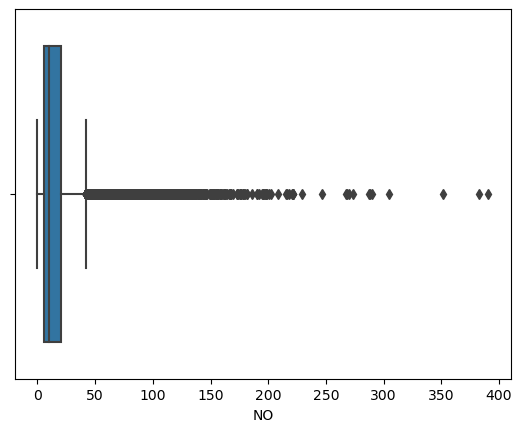

In [280]:
sns.boxplot(df,x='NO')

In [120]:
IQR=df['NO'].quantile(0.75)-df['NO'].quantile(0.25)

In [121]:
upper_bridge=df['NO'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['NO'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-16.050000000000004
41.71000000000001


In [286]:
upper_bridge1=df['NO'].quantile(0.75)+(IQR*3)
lower_bridge1=df['NO'].quantile(0.25)-(IQR*3)
print(lower_bridge1)
print(upper_bridge1)

-37.71000000000001
63.370000000000005


In [122]:
df.loc[df['NO']>41,'NO']=41

<AxesSubplot:xlabel='NO'>

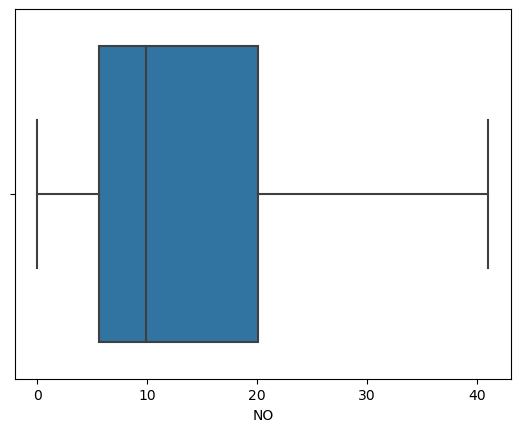

In [299]:
sns.boxplot(df,x='NO')

### NO2

<AxesSubplot:xlabel='NO2'>

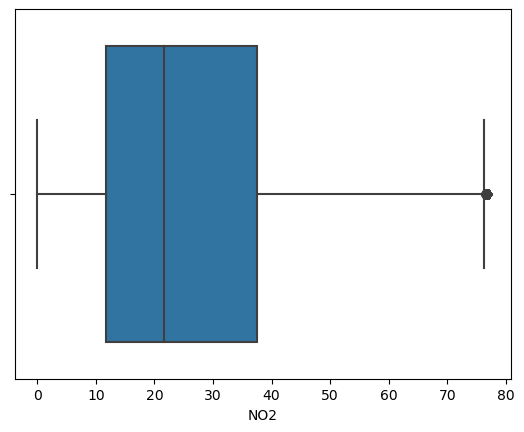

In [298]:
sns.boxplot(df,x='NO2')

In [123]:
IQR=df['NO2'].quantile(0.75)-df['NO2'].quantile(0.25)

In [124]:
upper_bridge=df['NO2'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['NO2'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-27.020000000000003
76.26


In [293]:
upper_bridge1=df['NO'].quantile(0.75)+(IQR*3)
lower_bridge1=df['NO'].quantile(0.25)-(IQR*3)
print(lower_bridge1)
print(upper_bridge1)

-71.85000000000001
97.51


In [125]:
df.loc[df['NO2']>75,'NO2']=75

<AxesSubplot:xlabel='NO2'>

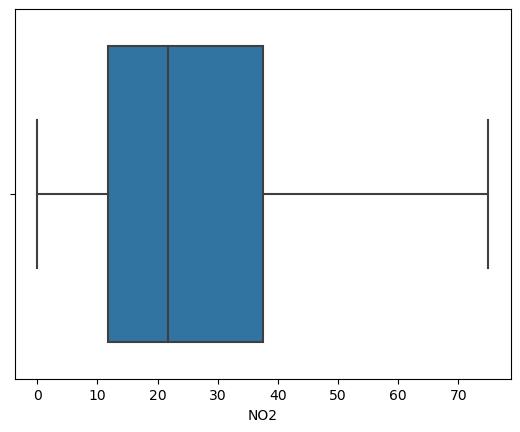

In [312]:
sns.boxplot(df,x='NO2')

### NOx

<AxesSubplot:xlabel='NOx'>

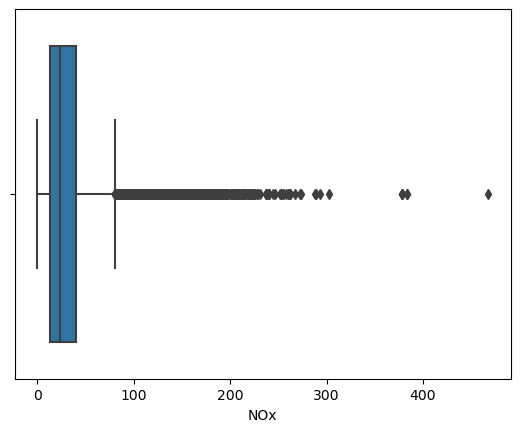

In [302]:
sns.boxplot(df,x='NOx')

In [126]:
IQR=df['NOx'].quantile(0.75)-df['NOx'].quantile(0.25)

In [127]:
upper_bridge=df['NOx'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['NOx'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-28.0325
80.7875


In [128]:
df.loc[df['NOx']>80,'NOx']=80

<AxesSubplot:xlabel='NOx'>

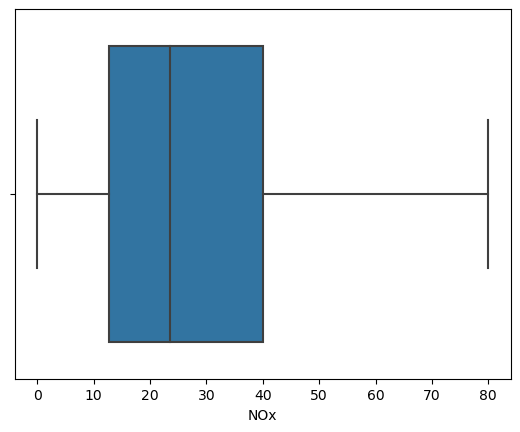

In [129]:
sns.boxplot(df,x='NOx')

### NH3

<AxesSubplot:xlabel='NH3'>

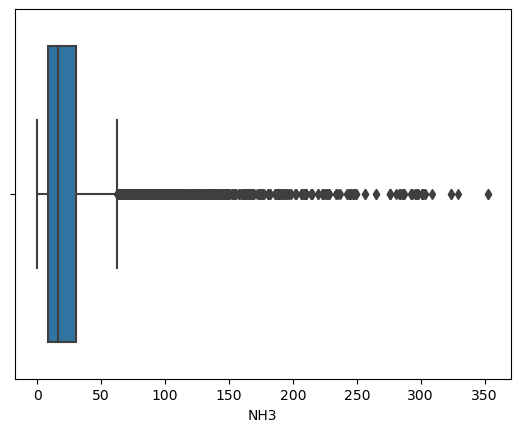

In [130]:
sns.boxplot(df,x='NH3')

In [131]:
IQR=df['NH3'].quantile(0.75)-df['NH3'].quantile(0.25)

In [132]:
upper_bridge=df['NH3'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['NH3'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-23.929999999999993
62.669999999999995


In [134]:
df.loc[df['NH3']>62,'NH3']=62

<AxesSubplot:xlabel='NH3'>

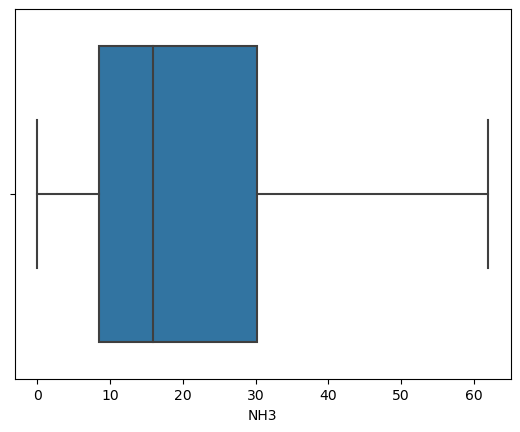

In [156]:
sns.boxplot(df,x='NH3')

### SO2

<AxesSubplot:xlabel='SO2'>

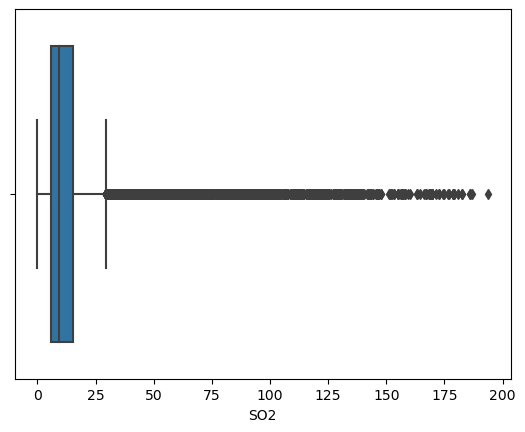

In [330]:
sns.boxplot(df,x='SO2')

In [135]:
IQR=df['SO2'].quantile(0.75)-df['SO2'].quantile(0.25)

In [136]:
upper_bridge=df['SO2'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['SO2'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-8.56
29.36


In [137]:
df.loc[df['SO2']>28,'SO2']=28

<AxesSubplot:xlabel='SO2'>

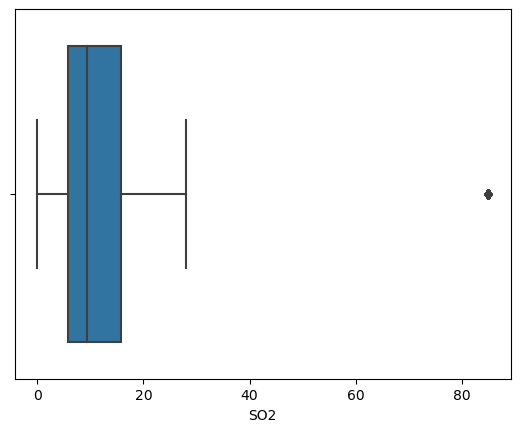

In [349]:
sns.boxplot(df,x='SO2')

### O3

<AxesSubplot:xlabel='O3'>

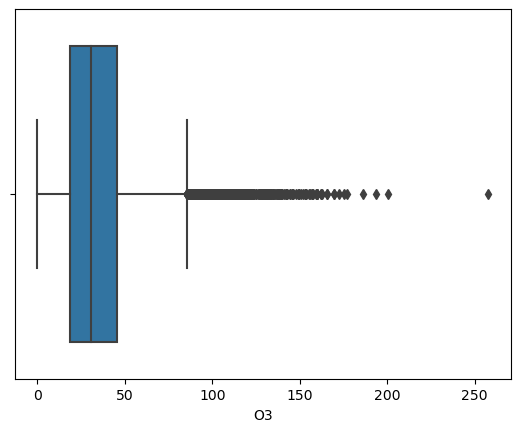

In [339]:
sns.boxplot(df,x='O3')

In [138]:
IQR=df['O3'].quantile(0.75)-df['O3'].quantile(0.25)

In [139]:
upper_bridge=df['O3'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['O3'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-21.124999999999996
85.55499999999999


In [140]:
df.loc[df['O3']>85,'O3']=85

<AxesSubplot:xlabel='O3'>

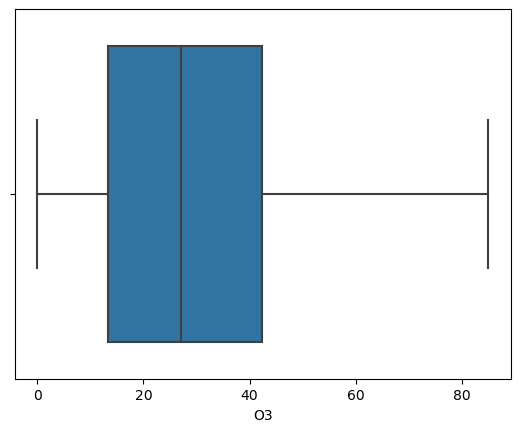

In [387]:
sns.boxplot(df,x='O3')

### CO

<AxesSubplot:xlabel='CO'>

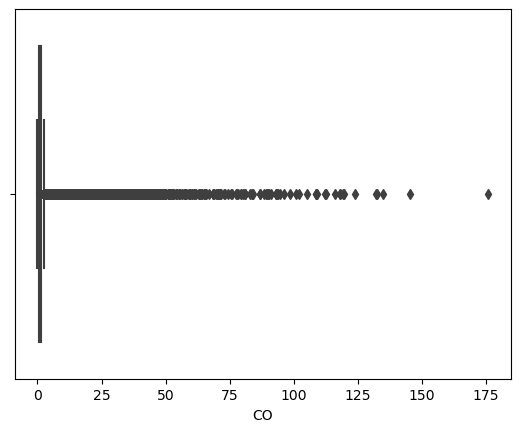

In [351]:
sns.boxplot(df,x='CO')

In [141]:
IQR=df['CO'].quantile(0.75)-df['CO'].quantile(0.25)

In [142]:
upper_bridge=df['CO'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['CO'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-0.7199999999999998
2.6399999999999997


In [143]:
df.loc[df['CO']>2,'CO']=2

<AxesSubplot:xlabel='CO'>

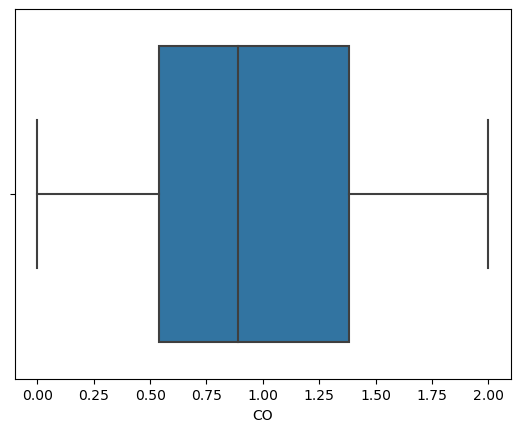

In [386]:
sns.boxplot(df,x='CO')

 ### Benzene 

<AxesSubplot:xlabel='Benzene'>

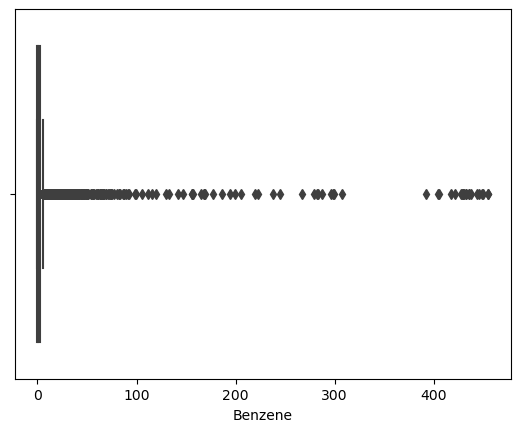

In [361]:
sns.boxplot(df,x='Benzene')

In [145]:
IQR=df['Benzene'].quantile(0.75)-df['Benzene'].quantile(0.25)

In [146]:
upper_bridge=df['Benzene'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Benzene'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-3.63
6.05


In [147]:
df.loc[df['Benzene']>3,'Benzene']=3

<AxesSubplot:xlabel='Benzene'>

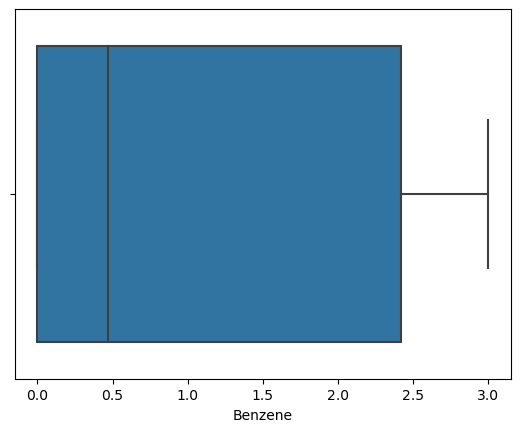

In [155]:
sns.boxplot(df,x='Benzene')

### Xylene

<AxesSubplot:xlabel='Xylene'>

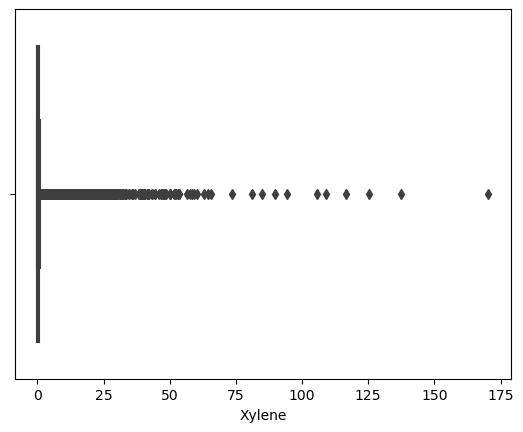

In [370]:
sns.boxplot(df,x='Xylene')

In [148]:
IQR=df['Xylene'].quantile(0.75)-df['Xylene'].quantile(0.25)

In [149]:
upper_bridge=df['Xylene'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Xylene'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-0.645
1.075


In [150]:
df.loc[df['Xylene']>1,'Xylene']=1

<AxesSubplot:xlabel='Xylene'>

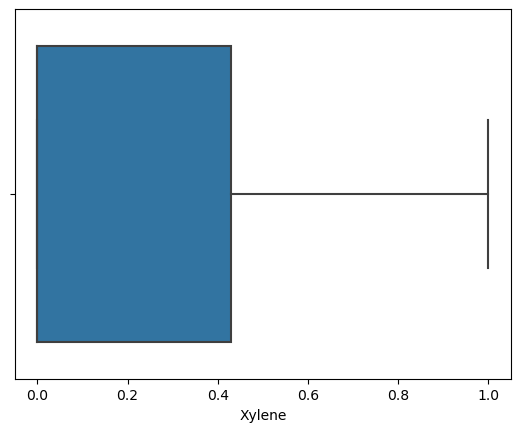

In [375]:
sns.boxplot(df,x='Xylene')

####  Toluene

<AxesSubplot:xlabel='Toluene'>

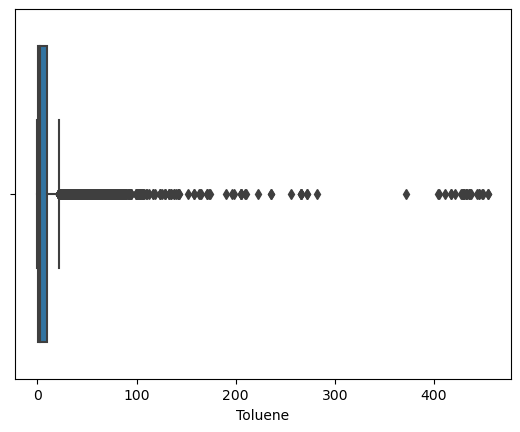

In [376]:
sns.boxplot(df,x='Toluene')

In [151]:
IQR=df['Toluene'].quantile(0.75)-df['Toluene'].quantile(0.25)

In [152]:
upper_bridge=df['Toluene'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Toluene'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-12.285
22.075


In [153]:
df.loc[df['Toluene']>1,'Toluene']=22

<AxesSubplot:xlabel='Toluene'>

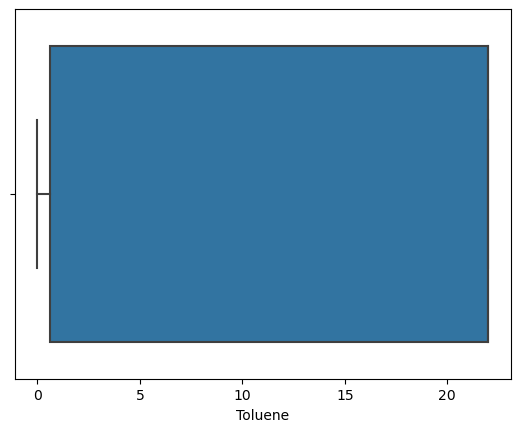

In [154]:
sns.boxplot(df,x='Toluene')

In [157]:
df.to_csv('air_quality_clean.csv',index=False)